In [2]:
import math 
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn

In [3]:
annotationsFile = "series_matrix_original.csv"
annotations= pd.read_csv(
    annotationsFile,
    sep = "	",
    header =0, 
    index_col =0,
)
annotations.head(20)

,R15181,R15183,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21863,R21864,R21866,R21868,R21869,R21870,R21871,R21872,R21873,R21874
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_geo_accession,GSM8015128,GSM8015129,GSM8015130,GSM8015131,GSM8015132,GSM8015133,GSM8015134,GSM8015135,GSM8015136,GSM8015137,...,GSM8015312,GSM8015313,GSM8015314,GSM8015315,GSM8015316,GSM8015317,GSM8015318,GSM8015319,GSM8015320,GSM8015321
!Sample_status,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,...,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024
!Sample_submission_date,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,...,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024
!Sample_last_update_date,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,...,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024
!Sample_type,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,...,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA
!Sample_channel_count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
!Sample_source_name_ch1,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,...,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC
!Sample_organism_ch1,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,...,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens,Homo sapiens
!Sample_characteristics_ch1,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,tissue: Nucleus Accumbens,...,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC


In [4]:
geneconversion= pd.read_csv(
    "ensembl_genename.csv",
    sep = ",",
    header =0, 
    #index_col =0,
)
geneconversion.head(20)

,Ensemble,Gene_Name
0,ENSG00000000003.14,TSPAN6
1,ENSG00000000005.5,TNMD
2,ENSG00000000419.12,DPM1
3,ENSG00000000457.13,SCYL3
4,ENSG00000000460.16,C1orf112
5,ENSG00000000938.12,FGR
6,ENSG00000000971.15,CFH
7,ENSG00000001036.13,FUCA2
8,ENSG00000001084.10,GCLC
9,ENSG00000001167.14,NFYA


In [5]:
#annotations=annotations.transpose()

In [6]:
annotations.columns=annotations.loc["!rnum_full"]

In [7]:
annotations

!rnum_full,rnum_full: R15181,rnum_full: R15183_merged,rnum_full: R15207,rnum_full: R15274,rnum_full: R15394,rnum_full: R15395,rnum_full: R15396,rnum_full: R15399,rnum_full: R15402,rnum_full: R15428,...,rnum_full: R21863_1,rnum_full: R21864,rnum_full: R21866,rnum_full: R21868,rnum_full: R21869,rnum_full: R21870,rnum_full: R21871,rnum_full: R21872,rnum_full: R21873,rnum_full: R21874
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_geo_accession,GSM8015128,GSM8015129,GSM8015130,GSM8015131,GSM8015132,GSM8015133,GSM8015134,GSM8015135,GSM8015136,GSM8015137,...,GSM8015312,GSM8015313,GSM8015314,GSM8015315,GSM8015316,GSM8015317,GSM8015318,GSM8015319,GSM8015320,GSM8015321
!Sample_status,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,...,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024
!Sample_submission_date,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,...,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024
!Sample_last_update_date,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,...,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024
!Sample_type,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,...,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
!Sample_relation,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...
!Sample_supplementary_file_1,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
!series_matrix_table_begin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
annotations.columns = annotations.columns.str.replace('rnum_full: ', '', regex=True)
annotations

!rnum_full,R15181,R15183_merged,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21863_1,R21864,R21866,R21868,R21869,R21870,R21871,R21872,R21873,R21874
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_geo_accession,GSM8015128,GSM8015129,GSM8015130,GSM8015131,GSM8015132,GSM8015133,GSM8015134,GSM8015135,GSM8015136,GSM8015137,...,GSM8015312,GSM8015313,GSM8015314,GSM8015315,GSM8015316,GSM8015317,GSM8015318,GSM8015319,GSM8015320,GSM8015321
!Sample_status,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,...,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024
!Sample_submission_date,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,...,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024
!Sample_last_update_date,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,...,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024
!Sample_type,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,...,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
!Sample_relation,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...
!Sample_supplementary_file_1,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
!series_matrix_table_begin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
countsFile = "countsNormNotLog.csv"
counts= pd.read_csv(
    countsFile,
    sep = ",",
    header =0, 
    index_col =0,
)
counts

,R15181,R15183_merged,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21863.1,R21864,R21866,R21868,R21869,R21870,R21871,R21872,R21873,R21874
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,7.142472,10.218326,6.230936,9.610644,8.871359,7.521943,8.434265,30.278368,7.668035,9.292714,...,4.958091,10.219586,6.194629,5.686899,7.179352,7.044621,6.923121,6.206841,6.107329,8.018841
ENSG00000000005.6,0.030265,0.027617,0.003919,0.001994,0.074759,0.002131,0.022919,0.003525,0.018748,0.031934,...,0.055709,0.047755,0.044727,0.115666,0.157048,0.083865,0.053255,0.027343,0.061899,0.091331
ENSG00000000419.14,14.103356,18.558689,17.752290,19.819461,21.480649,19.540004,20.535602,21.924500,21.316764,16.765206,...,20.055201,24.832638,21.021485,19.335455,23.602118,20.001693,21.807832,21.518870,22.427926,22.723095
ENSG00000000457.14,7.838560,9.472664,7.641714,8.912776,8.273290,8.757843,12.215933,11.349982,8.511707,8.717907,...,12.200247,10.410606,12.679981,12.434066,13.371542,13.711852,11.316641,11.648080,12.936807,13.334292
ENSG00000000460.17,7.596443,6.269081,4.976911,4.027697,4.186484,4.304341,4.125456,7.754646,4.237105,5.907739,...,2.451191,1.504285,2.661231,3.142252,1.548048,3.773904,5.085831,2.570234,2.744171,2.557261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000289707.1,0.090794,0.027617,0.078377,0.019939,0.099678,0.021309,0.229192,0.246739,0.131238,0.127735,...,0.027854,0.071633,0.022363,0.057833,0.002244,0.209661,0.133137,0.109372,0.020633,0.001827
ENSG00000289709.1,0.090794,0.276171,0.666201,0.478538,0.348874,0.362247,0.641738,2.009158,0.299972,1.085747,...,0.083563,0.047755,0.156543,0.077110,0.067306,0.209661,0.372783,0.136715,0.103164,0.073065
ENSG00000289711.1,0.030265,0.002762,0.003919,0.001994,0.002492,0.002131,0.022919,0.003525,0.001875,0.003193,...,0.002785,0.002388,0.002236,0.001928,0.002244,0.041932,0.002663,0.002734,0.002063,0.001827


In [10]:
#counts = counts.set_index("Gene")
#annotations=annotations.set_index("!Sample_title")

In [11]:
indexNames = counts.columns
annotations.columns = indexNames

In [12]:
#annotsmall=annotations.iloc[[6,9,10,11,12,13]]
#print(annotsmall)

In [13]:
# filter counts
matrix_t = annotations.transpose()
matrix_t_filt = matrix_t[matrix_t['!Sample_source_name_ch1'] == 'Nucleus Accumbens']
counts_filtered = counts[matrix_t_filt.index]
counts_filtered = counts_filtered.T
counts_filtered

Gene,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.14,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.17,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.15,...,ENSG00000289700.1,ENSG00000289701.1,ENSG00000289702.1,ENSG00000289703.1,ENSG00000289704.1,ENSG00000289707.1,ENSG00000289709.1,ENSG00000289711.1,ENSG00000289716.1,ENSG00000289719.1
R15181,7.142472,0.030265,14.103356,7.838560,7.596443,1.210588,5.235795,8.746502,51.177627,41.220537,...,0.003026,3.450177,0.423706,0.030265,0.003026,0.090794,0.090794,0.030265,1.604030,0.003026
R15183_merged,10.218326,0.027617,18.558689,9.472664,6.269081,1.463706,13.173355,21.762273,75.864166,46.313872,...,0.303788,2.430305,0.524725,0.055234,0.002762,0.027617,0.276171,0.002762,1.767494,0.027617
R15207,6.230936,0.003919,17.752290,7.641714,4.976911,0.940519,6.113371,8.621421,50.435314,29.979033,...,0.003919,1.959414,0.117565,0.003919,0.003919,0.078377,0.666201,0.003919,1.136460,0.003919
R15274,9.610644,0.001994,19.819461,8.912776,4.027697,2.592082,9.451131,11.983396,56.507396,33.697071,...,0.001994,1.575189,0.239269,0.001994,0.001994,0.019939,0.478538,0.001994,0.418721,0.079756
R15394,8.871359,0.074759,21.480649,8.273290,4.186484,0.498391,11.886624,11.786946,59.358361,30.028054,...,0.002492,1.644690,0.099678,0.149517,0.002492,0.099678,0.348874,0.002492,0.423632,0.024920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R21958,28.090699,0.100864,15.533097,11.901984,6.304017,1.865989,30.007120,16.037419,54.920594,43.976821,...,1.311235,3.984139,1.210371,0.005043,0.005043,0.252161,0.806914,0.050432,1.462532,0.201729
R21959,9.544532,0.004044,18.765521,9.625418,4.812709,0.889745,11.930665,11.809336,60.340856,38.865659,...,0.004044,1.658160,0.404429,0.004044,0.004044,0.080886,0.080886,0.004044,2.305247,0.004044
R21960,5.827676,0.027105,18.865405,7.616636,3.767660,0.623426,10.842187,6.451101,48.383260,35.887639,...,0.002711,2.818969,0.108422,0.002711,0.002711,0.108422,0.352371,0.002711,0.325266,0.054211
R21961_merged,10.330048,0.047169,20.211989,10.943247,3.702780,1.344321,7.759328,12.947937,74.998978,39.079656,...,0.002358,1.391490,0.117923,0.002358,0.002358,0.070754,0.424523,0.002358,0.518861,0.047169


In [14]:
annotations=matrix_t_filt.transpose()
annotations

,R15181,R15183_merged,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21951_merged,R21952,R21954,R21955,R21956_merged,R21958,R21959,R21960,R21961_merged,R21962
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_geo_accession,GSM8015128,GSM8015129,GSM8015130,GSM8015131,GSM8015132,GSM8015133,GSM8015134,GSM8015135,GSM8015136,GSM8015137,...,GSM8015216,GSM8015217,GSM8015218,GSM8015219,GSM8015220,GSM8015221,GSM8015222,GSM8015223,GSM8015224,GSM8015225
!Sample_status,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,...,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024,Public on Jan 19 2024
!Sample_submission_date,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,...,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024,Jan 12 2024
!Sample_last_update_date,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,...,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024,Jan 19 2024
!Sample_type,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,...,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA,SRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
!Sample_relation,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...
!Sample_supplementary_file_1,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
!series_matrix_table_begin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
counts=counts_filtered.transpose()
counts

,R15181,R15183_merged,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21951_merged,R21952,R21954,R21955,R21956_merged,R21958,R21959,R21960,R21961_merged,R21962
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,7.142472,10.218326,6.230936,9.610644,8.871359,7.521943,8.434265,30.278368,7.668035,9.292714,...,8.420485,17.834675,9.116875,28.022368,11.083181,28.090699,9.544532,5.827676,10.330048,7.666170
ENSG00000000005.6,0.030265,0.027617,0.003919,0.001994,0.074759,0.002131,0.022919,0.003525,0.018748,0.031934,...,0.002575,0.032605,0.018954,0.029970,0.025018,0.100864,0.004044,0.027105,0.047169,0.002530
ENSG00000000419.14,14.103356,18.558689,17.752290,19.819461,21.480649,19.540004,20.535602,21.924500,21.316764,16.765206,...,18.489015,23.051399,20.716724,18.911352,18.188426,15.533097,18.765521,18.865405,20.211989,19.127474
ENSG00000000457.14,7.838560,9.472664,7.641714,8.912776,8.273290,8.757843,12.215933,11.349982,8.511707,8.717907,...,7.338955,11.378979,9.647587,10.999154,10.582812,11.901984,9.625418,7.616636,10.943247,8.222790
ENSG00000000460.17,7.596443,6.269081,4.976911,4.027697,4.186484,4.304341,4.125456,7.754646,4.237105,5.907739,...,3.424845,4.336402,4.302558,4.675390,4.253140,6.304017,4.812709,3.767660,3.702780,3.390319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000289707.1,0.090794,0.027617,0.078377,0.019939,0.099678,0.021309,0.229192,0.246739,0.131238,0.127735,...,0.025751,0.130418,0.151632,0.029970,0.200148,0.252161,0.080886,0.108422,0.070754,0.002530
ENSG00000289709.1,0.090794,0.276171,0.666201,0.478538,0.348874,0.362247,0.641738,2.009158,0.299972,1.085747,...,0.463513,0.619486,0.568620,0.179823,0.750554,0.806914,0.080886,0.352371,0.424523,0.404814
ENSG00000289711.1,0.030265,0.002762,0.003919,0.001994,0.002492,0.002131,0.022919,0.003525,0.001875,0.003193,...,0.051501,0.003260,0.001895,0.002997,0.002502,0.050432,0.004044,0.002711,0.002358,0.002530


In [16]:
annotsmall=annotations.iloc[[6,9,10,11,12,13]]
annotsmall

,R15181,R15183_merged,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21951_merged,R21952,R21954,R21955,R21956_merged,R21958,R21959,R21960,R21961_merged,R21962
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_source_name_ch1,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,...,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens,Nucleus Accumbens
!Sample_characteristics_ch1,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,...,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case
!Sample_characteristics_ch1,Sex: M,Sex: M,Sex: M,Sex: F,Sex: M,Sex: F,Sex: M,Sex: M,Sex: M,Sex: M,...,Sex: M,Sex: M,Sex: M,Sex: F,Sex: M,Sex: M,Sex: M,Sex: M,Sex: F,Sex: F
!Sample_characteristics_ch1,agedeath: 31.54,agedeath: 35.25,agedeath: 61.75,agedeath: 38.39,agedeath: 46.79,agedeath: 52.69,agedeath: 38.99,agedeath: 65.59057723,agedeath: 52.92,agedeath: 43.11,...,agedeath: 62.07802875,agedeath: 47.8110883,agedeath: 49.41010723,agedeath: 29.12251882,agedeath: 73.63449692,agedeath: 55.41672371,agedeath: 78.37907826,agedeath: 47.28542094,agedeath: 24.76374629,agedeath: 37.4701118
!Sample_characteristics_ch1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,...,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0
!Smoker_Status,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,...,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,current smoker at death: Control,current smoker at death: Control,current smoker at death: Case


In [17]:
annotsmall=annotsmall.transpose()
annotsmall

!Sample_title,!Sample_source_name_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Smoker_Status
R15181,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 31.54,dsm-5 major depression diagnosis: 0,current smoker at death: Case
R15183_merged,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 35.25,dsm-5 major depression diagnosis: 0,current smoker at death: Case
R15207,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 61.75,dsm-5 major depression diagnosis: 0,current smoker at death: Case
R15274,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: F,agedeath: 38.39,dsm-5 major depression diagnosis: 0,current smoker at death: Control
R15394,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 46.79,dsm-5 major depression diagnosis: 0,current smoker at death: Case
...,...,...,...,...,...,...
R21958,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 55.41672371,dsm-5 major depression diagnosis: 0,current smoker at death: Control
R21959,Nucleus Accumbens,dsm-5 aud status: AUD_Case,Sex: M,agedeath: 78.37907826,dsm-5 major depression diagnosis: 1,current smoker at death: Control
R21960,Nucleus Accumbens,dsm-5 aud status: AUD_Case,Sex: M,agedeath: 47.28542094,dsm-5 major depression diagnosis: 1,current smoker at death: Control
R21961_merged,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: F,agedeath: 24.76374629,dsm-5 major depression diagnosis: 1,current smoker at death: Control


In [18]:
annotsmall.columns=["Brain_Region","AUD_Status","Sex","Age","Depression_Status","Smoker_Status"]

In [19]:
annotsmall

,Brain_Region,AUD_Status,Sex,Age,Depression_Status,Smoker_Status
R15181,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 31.54,dsm-5 major depression diagnosis: 0,current smoker at death: Case
R15183_merged,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 35.25,dsm-5 major depression diagnosis: 0,current smoker at death: Case
R15207,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 61.75,dsm-5 major depression diagnosis: 0,current smoker at death: Case
R15274,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: F,agedeath: 38.39,dsm-5 major depression diagnosis: 0,current smoker at death: Control
R15394,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 46.79,dsm-5 major depression diagnosis: 0,current smoker at death: Case
...,...,...,...,...,...,...
R21958,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 55.41672371,dsm-5 major depression diagnosis: 0,current smoker at death: Control
R21959,Nucleus Accumbens,dsm-5 aud status: AUD_Case,Sex: M,agedeath: 78.37907826,dsm-5 major depression diagnosis: 1,current smoker at death: Control
R21960,Nucleus Accumbens,dsm-5 aud status: AUD_Case,Sex: M,agedeath: 47.28542094,dsm-5 major depression diagnosis: 1,current smoker at death: Control
R21961_merged,Nucleus Accumbens,dsm-5 aud status: non_AUD_Control,Sex: F,agedeath: 24.76374629,dsm-5 major depression diagnosis: 1,current smoker at death: Control


In [20]:
smoker_nonAUD=annotsmall[(annotsmall['Smoker_Status']=='current smoker at death: Case') & (annotsmall['AUD_Status']=='dsm-5 aud status: non_AUD_Control')]
#print(nonsmoker_AUD)
smoker_nonAUDSamples=list(smoker_nonAUD.index) #pulls name of genes that meet criterias and makes it into a list
smoker_nonAUDSamples

['R15181',
 'R15183_merged',
 'R15207',
 'R15394',
 'R15395',
 'R15396',
 'R15399',
 'R15477',
 'R15480',
 'R15481',
 'R19425',
 'R21876',
 'R21880',
 'R21910_merged',
 'R21911',
 'R21915',
 'R21926_merged',
 'R21931',
 'R21932',
 'R21934',
 'R21940_merged',
 'R21942',
 'R21943',
 'R21944']

In [21]:
nonsmoker_nonAUD=annotsmall[(annotsmall['Smoker_Status']=='current smoker at death: Control') & (annotsmall['AUD_Status']=='dsm-5 aud status: non_AUD_Control')]
#print(nonsmoker_nonAUD)
nonsmoker_nonAUDSamples=list(nonsmoker_nonAUD.index) #pulls name of genes that meet criterias and makes it into a list
nonsmoker_nonAUDSamples

['R15274',
 'R15402',
 'R15428',
 'R19592',
 'R19728_merged',
 'R19752_merged',
 'R19802',
 'R21879',
 'R21881',
 'R21882_merged',
 'R21883',
 'R21886',
 'R21896',
 'R21906',
 'R21908',
 'R21935',
 'R21936',
 'R21937',
 'R21945_merged',
 'R21950',
 'R21955',
 'R21958',
 'R21961_merged']

In [22]:
conditions=[]
for i in smoker_nonAUDSamples:
            conditions.append(-1)
        #add -1 to represent smoker
for i in nonsmoker_nonAUDSamples:
            conditions.append(1)
        #add 1 to represent nonsmoker
print(conditions)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [23]:
#print(smoker_nonAUDSamples) #just testing that it's right
#print(nonsmoker_nonAUDSamples) #just testing that it's right
smoker_analysisSamples=smoker_nonAUDSamples+nonsmoker_nonAUDSamples #combine smoker and nonsmoker lists
print(smoker_analysisSamples)

['R15181', 'R15183_merged', 'R15207', 'R15394', 'R15395', 'R15396', 'R15399', 'R15477', 'R15480', 'R15481', 'R19425', 'R21876', 'R21880', 'R21910_merged', 'R21911', 'R21915', 'R21926_merged', 'R21931', 'R21932', 'R21934', 'R21940_merged', 'R21942', 'R21943', 'R21944', 'R15274', 'R15402', 'R15428', 'R19592', 'R19728_merged', 'R19752_merged', 'R19802', 'R21879', 'R21881', 'R21882_merged', 'R21883', 'R21886', 'R21896', 'R21906', 'R21908', 'R21935', 'R21936', 'R21937', 'R21945_merged', 'R21950', 'R21955', 'R21958', 'R21961_merged']


In [24]:
#counts.columns = counts.columns.str.replace('.', '_', regex=False)
#counts

In [25]:
smoker_analysisSamples

['R15181',
 'R15183_merged',
 'R15207',
 'R15394',
 'R15395',
 'R15396',
 'R15399',
 'R15477',
 'R15480',
 'R15481',
 'R19425',
 'R21876',
 'R21880',
 'R21910_merged',
 'R21911',
 'R21915',
 'R21926_merged',
 'R21931',
 'R21932',
 'R21934',
 'R21940_merged',
 'R21942',
 'R21943',
 'R21944',
 'R15274',
 'R15402',
 'R15428',
 'R19592',
 'R19728_merged',
 'R19752_merged',
 'R19802',
 'R21879',
 'R21881',
 'R21882_merged',
 'R21883',
 'R21886',
 'R21896',
 'R21906',
 'R21908',
 'R21935',
 'R21936',
 'R21937',
 'R21945_merged',
 'R21950',
 'R21955',
 'R21958',
 'R21961_merged']

In [26]:
countsSmall=counts[smoker_analysisSamples] #all samples
countsSmall

,R15181,R15183_merged,R15207,R15394,R15395,R15396,R15399,R15477,R15480,R15481,...,R21906,R21908,R21935,R21936,R21937,R21945_merged,R21950,R21955,R21958,R21961_merged
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,7.142472,10.218326,6.230936,8.871359,7.521943,8.434265,30.278368,6.816184,9.645205,18.015778,...,4.683663,7.218952,7.465010,3.703177,9.540799,8.353589,9.119853,28.022368,28.090699,10.330048
ENSG00000000005.6,0.030265,0.027617,0.003919,0.074759,0.002131,0.022919,0.003525,0.040332,0.002448,0.028150,...,0.001551,0.002235,0.001934,0.003561,0.003256,0.057216,0.076853,0.029970,0.100864,0.047169
ENSG00000000419.14,14.103356,18.558689,17.752290,21.480649,19.540004,20.535602,21.924500,19.440240,22.154596,19.620308,...,20.068408,14.147358,18.469131,20.189434,19.016474,21.255879,18.239706,18.911352,15.533097,20.211989
ENSG00000000457.14,7.838560,9.472664,7.641714,8.273290,8.757843,12.215933,11.349982,9.962115,7.686788,10.893916,...,7.211600,8.001191,8.741411,6.231307,9.768737,11.357448,8.376944,10.999154,11.901984,10.943247
ENSG00000000460.17,7.596443,6.269081,4.976911,4.186484,4.304341,4.125456,7.754646,5.465047,5.581489,7.093712,...,4.590610,3.710050,3.790523,3.952429,5.503055,6.951788,3.945105,4.675390,6.304017,3.702780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000289707.1,0.090794,0.027617,0.078377,0.099678,0.021309,0.229192,0.246739,0.161330,0.002448,0.084449,...,0.124071,0.089399,0.058018,0.035607,0.097687,0.228865,0.179323,0.029970,0.252161,0.070754
ENSG00000289709.1,0.090794,0.276171,0.666201,0.348874,0.362247,0.641738,2.009158,0.504156,0.416164,0.253347,...,0.682388,0.469344,0.019339,0.498505,0.455874,0.457731,0.409881,0.179823,0.806914,0.424523
ENSG00000289711.1,0.030265,0.002762,0.003919,0.002492,0.002131,0.022919,0.003525,0.002017,0.024480,0.002815,...,0.015509,0.002235,0.001934,0.035607,0.003256,0.002861,0.002562,0.002997,0.050432,0.002358


In [27]:
###depression t-test (1)
noofsmokersamples=93
def mytstatistic1(x,y=conditions,n=noofsmokersamples):
    #Inputs: x, a pandas series with expression data for a gene
    #Inputs: y=default argument, conditions: list of -1s and 1s to indicate sample conditions
    #Inputs: n=default argument, noofsamples: number of samples
    #your code to calculate correlation coefficent (cc),t-statistic (t) and p-value (p)
    cc=np.corrcoef(x.values,y)[1,0] #correlation coefficient
    t=((math.sqrt(noofsmokersamples-2)/math.sqrt(1-(cc**2)))*cc) #t-stat
    p=2*(1-scipy.stats.t.cdf(np.abs(t), noofsmokersamples-2)) #p-value
    return pd.Series([cc,t,p])

In [28]:
tInfo=countsSmall.apply(mytstatistic1,axis=1)
tInfo.columns=['correlation coefficient','t-statistic','p-value'] #naming the columns
tInfo

,correlation coefficient,t-statistic,p-value
Gene,,,
ENSG00000000003.15,0.061267,0.585548,0.559629
ENSG00000000005.6,0.078885,0.754872,0.452275
ENSG00000000419.14,-0.248291,-2.445109,0.016406
ENSG00000000457.14,0.202696,1.974586,0.051347
ENSG00000000460.17,0.110336,1.059001,0.292402
...,...,...,...
ENSG00000289707.1,0.210024,2.049211,0.043321
ENSG00000289709.1,0.145277,1.400711,0.164701
ENSG00000289711.1,0.085223,0.815940,0.416665


In [29]:
condition1=nonsmoker_nonAUD.index
condition2=smoker_nonAUD.index
#made sample name lists for each condition

def mylog2foldchange(x,c1=condition1,c2=condition2):
    expr1=x[c1]+0.1
    expr2=x[c2]+0.1
#add to prevent error (divide by 0)
    
    mean1=expr1.mean()
    mean2=expr2.mean()
#find mean expression for each condition
    
    if mean1==mean2:
        return 0
    else:
        log2fc=np.log2(mean1/mean2)
#if means are "=" then log2FC is 0
#if not find log2 fold change
        return log2fc

In [30]:
log2fc=countsSmall.apply(mylog2foldchange, axis=1)
print(log2fc)

Gene
ENSG00000000003.15    0.103073
ENSG00000000005.6     0.056390
ENSG00000000419.14   -0.080530
ENSG00000000457.14    0.107408
ENSG00000000460.17    0.083536
                        ...   
ENSG00000289707.1     0.312509
ENSG00000289709.1     0.251835
ENSG00000289711.1     0.025808
ENSG00000289716.1     0.017240
ENSG00000289719.1     0.209944
Length: 42163, dtype: float64


In [31]:
tInfo['log2FC']=log2fc

de_genes = tInfo[(tInfo['p-value'] < 0.05) & (tInfo['log2FC'].abs() >= 0.5)]
print("Number of DE genes:", len(de_genes))

Number of DE genes: 264


In [32]:
print(de_genes)

                    correlation coefficient  t-statistic   p-value    log2FC
Gene                                                                        
ENSG00000004948.16                 0.304234     3.046626  0.003028  0.988780
ENSG00000007516.14                 0.256460     2.531125  0.013086  0.642682
ENSG00000013588.9                  0.290826     2.899635  0.004683  0.554018
ENSG00000018280.17                 0.212345     2.072917  0.041008  0.585214
ENSG00000019169.11                 0.263917     2.610146  0.010583  0.654947
...                                     ...          ...       ...       ...
ENSG00000289289.1                  0.289764     2.888074  0.004843  0.628181
ENSG00000289517.1                 -0.304482    -3.049367  0.003003 -0.789876
ENSG00000289577.1                 -0.384828    -3.977322  0.000140 -0.773564
ENSG00000289594.1                  0.268195     2.655707  0.009344  0.666713
ENSG00000289697.1                 -0.284106    -2.826674  0.005782 -0.774134

In [33]:
# Assume de_genes is already defined as a flat list
# If it’s not, and you're pulling it from a DataFrame:
# de_genes = your_df['gene_column'].tolist()
# Extract gene IDs from the index (not from a column)
de_genes = de_genes.index.tolist()

# Print sample to confirm
print("Sample DE genes:", de_genes[:5])

# Create a lookup dictionary from your conversion CSV
conversion_dict = dict(zip(geneconversion['Ensemble'], geneconversion['Gene_Name']))

# Map the gene IDs to names, keep original if no match
converted_genes = [conversion_dict.get(g, g) for g in de_genes]

# Create the final DataFrame
converted_df = pd.DataFrame({
    'Ensemble_ID': de_genes,
    'Gene_Name': converted_genes
})

# Save to CSV
converted_df.to_csv('converted_DE_genes.csv', index=False)

# Print confirmation
print(converted_df.head())

Sample DE genes: ['ENSG00000004948.16', 'ENSG00000007516.14', 'ENSG00000013588.9', 'ENSG00000018280.17', 'ENSG00000019169.11']
          Ensemble_ID           Gene_Name
0  ENSG00000004948.16  ENSG00000004948.16
1  ENSG00000007516.14  ENSG00000007516.14
2   ENSG00000013588.9   ENSG00000013588.9
3  ENSG00000018280.17  ENSG00000018280.17
4  ENSG00000019169.11  ENSG00000019169.11


/opt/jupyterhub/pyvenv/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/jupyterhub/pyvenv/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


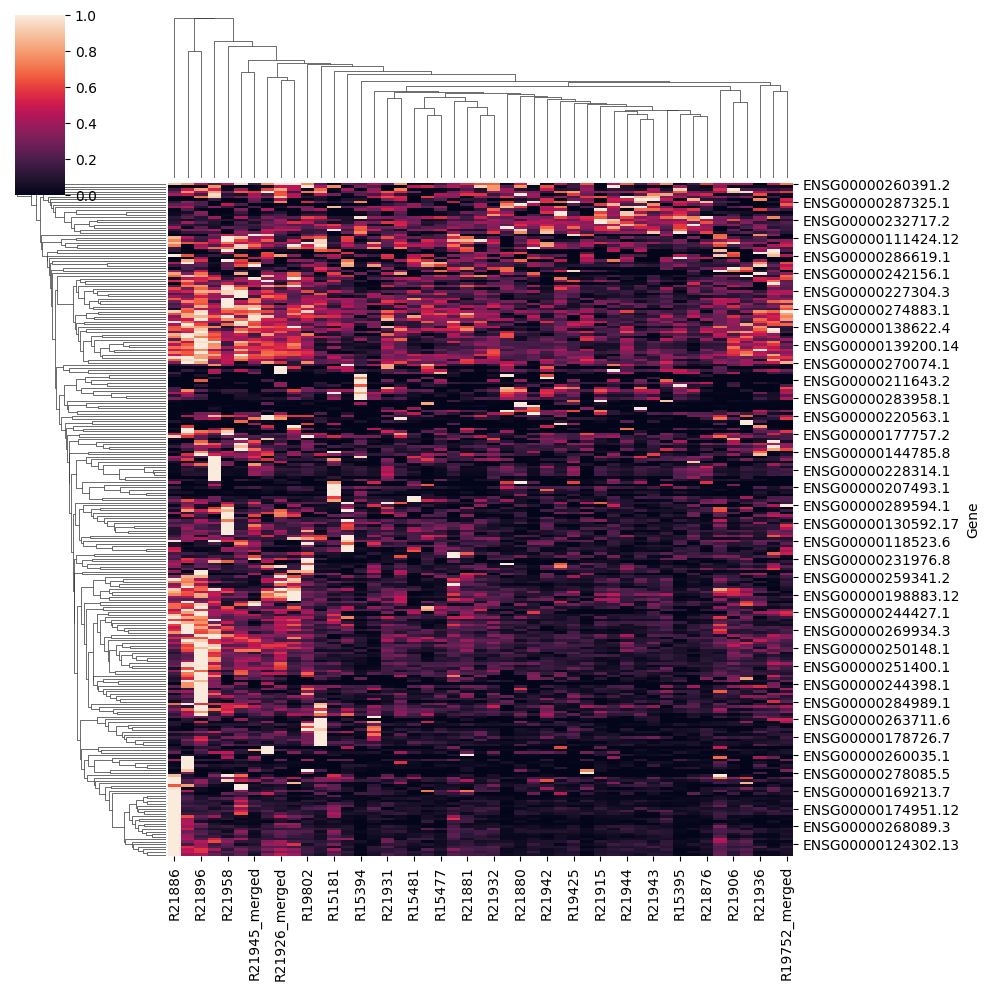

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming de_genes is a list of Ensemble IDs
DEG = countsSmall.loc[de_genes]  

# Plot heatmap with standard scaling applied across genes (axis=0)
plot = sns.clustermap(DEG, standard_scale=0)

# Optional: show plot if needed in some environments
plt.show()

#standard_scale***

/opt/jupyterhub/pyvenv/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


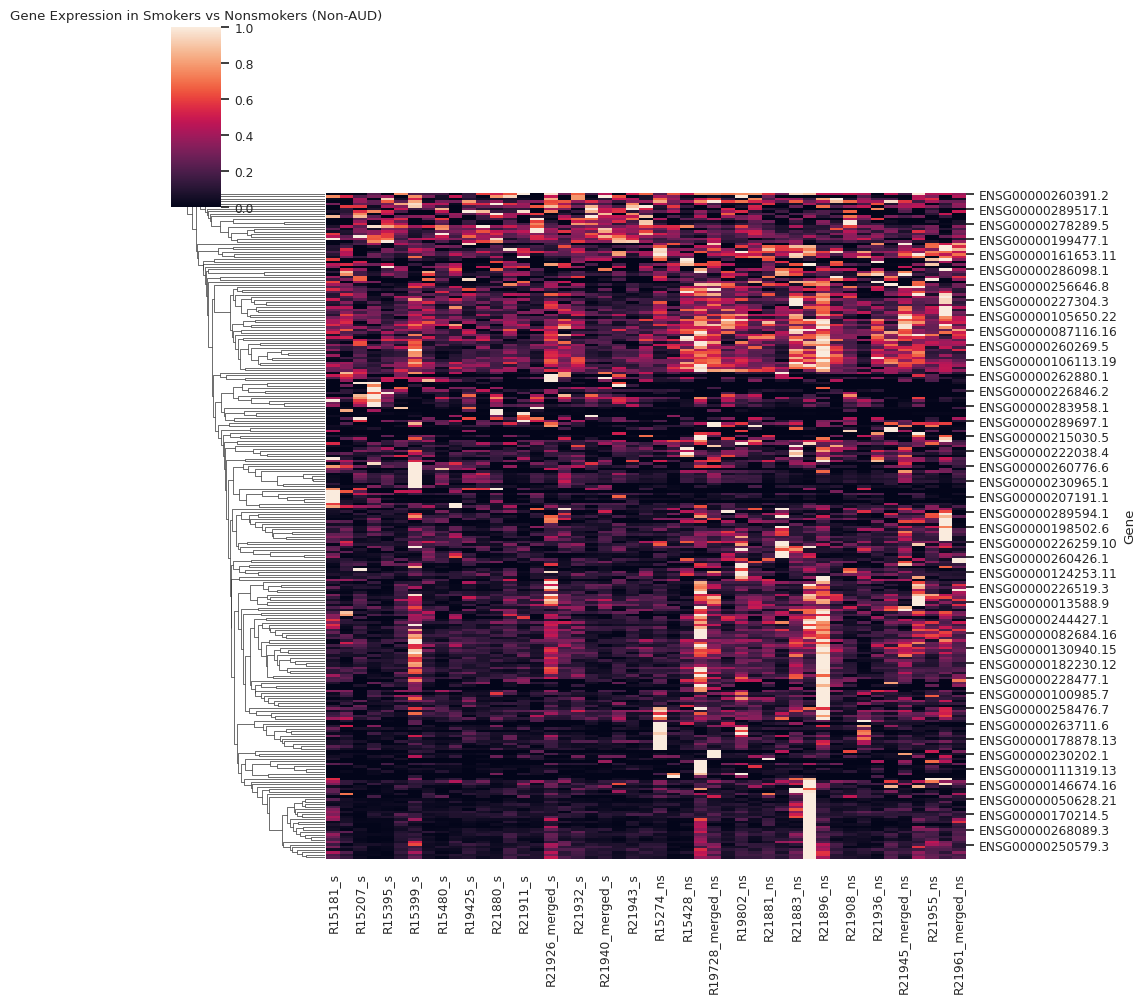

In [35]:
# Create a copy of the original names so we don't lose them
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create new column names with smoker/non-smoker labels
new_column_names = {}
for sample in smoker_analysisSamples:
    if sample in smoker_nonAUDSamples:
        new_column_names[sample] = f"{sample}_s"
    elif sample in nonsmoker_nonAUDSamples:
        new_column_names[sample] = f"{sample}_ns"

# Step 2: Rename columns in countsSmall
countsSmall_renamed = countsSmall.rename(columns=new_column_names)

# Step 3: Subset only DE genes
DEG_renamed = countsSmall_renamed.loc[de_genes]

# Step 4: Group columns manually
smoker_cols = [col for col in DEG_renamed.columns if col.endswith('_s')]
nonsmoker_cols = [col for col in DEG_renamed.columns if col.endswith('_ns')]

# Step 5: Reorder the DataFrame with smokers on the left, nonsmokers on the right
DEG_ordered = DEG_renamed[smoker_cols + nonsmoker_cols]

# Step 6: Plot the heatmap
sns.set(font_scale=0.8)
g = sns.clustermap(DEG_ordered, standard_scale=0, col_cluster=False)

plt.title("Gene Expression in Smokers vs Nonsmokers (Non-AUD)")
plt.show()

In [36]:
print(de_genes)

['ENSG00000004948.16', 'ENSG00000007516.14', 'ENSG00000013588.9', 'ENSG00000018280.17', 'ENSG00000019169.11', 'ENSG00000050628.21', 'ENSG00000064300.9', 'ENSG00000069188.17', 'ENSG00000070729.14', 'ENSG00000077238.14', 'ENSG00000079385.23', 'ENSG00000082684.16', 'ENSG00000087116.16', 'ENSG00000090020.11', 'ENSG00000100095.19', 'ENSG00000100985.7', 'ENSG00000101276.18', 'ENSG00000102287.19', 'ENSG00000104415.14', 'ENSG00000104689.10', 'ENSG00000105613.10', 'ENSG00000105650.22', 'ENSG00000106113.19', 'ENSG00000106366.9', 'ENSG00000108342.13', 'ENSG00000111319.13', 'ENSG00000111424.12', 'ENSG00000115602.17', 'ENSG00000118523.6', 'ENSG00000124253.11', 'ENSG00000124302.13', 'ENSG00000130592.17', 'ENSG00000130940.15', 'ENSG00000133124.12', 'ENSG00000134184.13', 'ENSG00000136928.7', 'ENSG00000137869.16', 'ENSG00000138622.4', 'ENSG00000139200.14', 'ENSG00000140557.12', 'ENSG00000140955.11', 'ENSG00000144407.10', 'ENSG00000144785.8', 'ENSG00000146674.16', 'ENSG00000147573.17', 'ENSG00000149452.

In [37]:
nonsmoker_nonAUDSamples

['R15274',
 'R15402',
 'R15428',
 'R19592',
 'R19728_merged',
 'R19752_merged',
 'R19802',
 'R21879',
 'R21881',
 'R21882_merged',
 'R21883',
 'R21886',
 'R21896',
 'R21906',
 'R21908',
 'R21935',
 'R21936',
 'R21937',
 'R21945_merged',
 'R21950',
 'R21955',
 'R21958',
 'R21961_merged']

In [38]:
smoker_nonAUDSamples

['R15181',
 'R15183_merged',
 'R15207',
 'R15394',
 'R15395',
 'R15396',
 'R15399',
 'R15477',
 'R15480',
 'R15481',
 'R19425',
 'R21876',
 'R21880',
 'R21910_merged',
 'R21911',
 'R21915',
 'R21926_merged',
 'R21931',
 'R21932',
 'R21934',
 'R21940_merged',
 'R21942',
 'R21943',
 'R21944']

In [39]:
pd.Series(de_genes, name='Gene_ID').to_csv('smoker_de_genes.csv', index=False)

In [40]:
researchers_NAc = "researchers_NAc.csv"
researchers_NAc = pd.read_csv(
    researchers_NAc,
    sep = ",",
    header =0, 
    index_col =0,
)
researchers_NAc.head(20)

,SYMBOL,pvalue,overall.eff.direction,p.adjust.fdr,Nac_LIBD_log_2_fold_change,Nac_UT_log_2_fold_change,same_direction
Ensembl ID,,,,,,,
ENSG00000115758.13,ODC1,1.590000e-09,+,0.000023,0.271592,0.222004,True
ENSG00000223547.10,ZNF844,2.370000e-09,+,0.000023,0.424554,0.098229,True
ENSG00000113369.9,ARRDC3,5.150000e-08,+,0.000329,0.475648,0.355734,True
ENSG00000231528.3,FAM225A,8.470000e-08,+,0.000406,0.583752,0.892203,True
ENSG00000228315.12,GUSBP11,2.340000e-07,-,0.000895,-0.180689,-0.139503,True
ENSG00000167703.15,SLC43A2,5.210000e-07,+,0.001663,0.227204,0.357006,True
ENSG00000125520.14,SLC2A4RG,1.350000e-06,+,0.003702,0.383701,0.367090,True
ENSG00000198830.11,HMGN2,1.790000e-06,+,0.004280,0.176326,0.244230,True
ENSG00000113240.14,CLK4,2.090000e-06,-,0.004443,-0.207578,-0.095360,True


In [41]:
researchers_NAc=researchers_NAc.transpose()
researchers_NAc

Ensembl ID,ENSG00000115758.13,ENSG00000223547.10,ENSG00000113369.9,ENSG00000231528.3,ENSG00000228315.12,ENSG00000167703.15,ENSG00000125520.14,ENSG00000198830.11,ENSG00000113240.14,ENSG00000170558.10,...,ENSG00000289365.1,ENSG00000289410.1,ENSG00000289413.1,ENSG00000289488.1,ENSG00000289511.1,ENSG00000289554.1,ENSG00000289628.1,ENSG00000289687.1,ENSG00000289694.1,ENSG00000289701.1
SYMBOL,ODC1,ZNF844,ARRDC3,FAM225A,GUSBP11,SLC43A2,SLC2A4RG,HMGN2,CLK4,CDH2,...,ENSG00000289365,ENSG00000289410,NaN,ENSG00000289488,ENSG00000289511,ENSG00000289554,ENSG00000289628,ENSG00000289687,ENSG00000289694,ENSG00000289701
pvalue,0.0,0.0,0.0,0.0,0.0,0.000001,0.000001,0.000002,0.000002,0.000002,...,0.823448,0.796811,0.917965,1.0,1.0,1.0,0.808622,0.843218,1.0,0.832027
overall.eff.direction,+,+,+,+,-,+,+,+,-,+,...,-,+,-,+,+,-,-,+,+,-
p.adjust.fdr,0.000023,0.000023,0.000329,0.000406,0.000895,0.001663,0.003702,0.00428,0.004443,0.004642,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Nac_LIBD_log_2_fold_change,0.271592,0.424554,0.475648,0.583752,-0.180689,0.227204,0.383701,0.176326,-0.207578,0.100945,...,-0.073789,0.125252,-0.074099,-0.011498,0.045471,-0.050269,0.03125,0.084167,-0.07146,-0.111085
Nac_UT_log_2_fold_change,0.222004,0.098229,0.355734,0.892203,-0.139503,0.357006,0.36709,0.24423,-0.09536,0.068306,...,0.048374,-0.067499,0.094923,0.025994,-0.047027,0.056303,-0.10018,-0.008359,0.310088,0.290622
same_direction,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [42]:
NAcsmall=researchers_NAc.iloc[[1,3,4,5,6]]
NAcsmall

Ensembl ID,ENSG00000115758.13,ENSG00000223547.10,ENSG00000113369.9,ENSG00000231528.3,ENSG00000228315.12,ENSG00000167703.15,ENSG00000125520.14,ENSG00000198830.11,ENSG00000113240.14,ENSG00000170558.10,...,ENSG00000289365.1,ENSG00000289410.1,ENSG00000289413.1,ENSG00000289488.1,ENSG00000289511.1,ENSG00000289554.1,ENSG00000289628.1,ENSG00000289687.1,ENSG00000289694.1,ENSG00000289701.1
pvalue,0.0,0.0,0.0,0.0,0.0,0.000001,0.000001,0.000002,0.000002,0.000002,...,0.823448,0.796811,0.917965,1.0,1.0,1.0,0.808622,0.843218,1.0,0.832027
p.adjust.fdr,0.000023,0.000023,0.000329,0.000406,0.000895,0.001663,0.003702,0.00428,0.004443,0.004642,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Nac_LIBD_log_2_fold_change,0.271592,0.424554,0.475648,0.583752,-0.180689,0.227204,0.383701,0.176326,-0.207578,0.100945,...,-0.073789,0.125252,-0.074099,-0.011498,0.045471,-0.050269,0.03125,0.084167,-0.07146,-0.111085
Nac_UT_log_2_fold_change,0.222004,0.098229,0.355734,0.892203,-0.139503,0.357006,0.36709,0.24423,-0.09536,0.068306,...,0.048374,-0.067499,0.094923,0.025994,-0.047027,0.056303,-0.10018,-0.008359,0.310088,0.290622
same_direction,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [43]:
NAcsmall=NAcsmall.transpose()

In [44]:
NAcsmall=abs(NAcsmall)

In [45]:
NAc_p_filtered = NAcsmall[(NAcsmall['pvalue'] < 0.05)]
NAc_p_filtered

,pvalue,p.adjust.fdr,Nac_LIBD_log_2_fold_change,Nac_UT_log_2_fold_change,same_direction
Ensembl ID,,,,,
ENSG00000115758.13,0.0,0.000023,0.271592,0.222004,1
ENSG00000223547.10,0.0,0.000023,0.424554,0.098229,1
ENSG00000113369.9,0.0,0.000329,0.475648,0.355734,1
ENSG00000231528.3,0.0,0.000406,0.583752,0.892203,1
ENSG00000228315.12,0.0,0.000895,0.180689,0.139503,1
...,...,...,...,...,...
ENSG00000206052.11,0.0485,0.441636,0.117763,0.045048,0
ENSG00000135622.13,0.049008,0.443505,0.096772,0.028658,0
ENSG00000242852.7,0.049004,0.443505,0.127021,0.046245,0


In [53]:
NAc_filtered = NAc_p_filtered[
    (NAc_p_filtered['NAc_LIBD_log_2_fold_change'] > 0.5) |
    (NAc_p_filtered['NAc_UT_log_2_fold_change'] > 0.5) |
    (NAc_p_filtered['NAc_NYGC_log_2_fold_change'] > 0.5) |
    (NAc_p_filtered['NAc_LIBD_log_2_fold_change'] < -0.5) |
    (NAc_p_filtered['NAc_UT_log_2_fold_change'] < -0.5) |
    (NAc_p_filtered['NAc_NYGC_log_2_fold_change'] < -0.5)
]

NAc_filtered

KeyError: 'NAc_LIBD_log_2_fold_change'

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

In [55]:
df1 = pd.read_csv('smoker_de_genes.csv')
df2 = pd.read_csv('NAc_filtered.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'NAc_filtered.csv'

In [51]:
set1 = set(df1['Gene_ID'])
set2 = set(df2['Ensembl ID'])

NameError: name 'df2' is not defined

In [52]:
plt.figure(figsize=(6, 6))
venn2([set1, set2], set_labels=('Smoker DEG', "Researchers' DEG"))
plt.title("Venn Diagram between Smoker DEG and researchers' DEG")
plt.show()

NameError: name 'set2' is not defined

<Figure size 600x600 with 0 Axes>

NameError: name 'set1' is not defined